## Project 7
In this project, you will implement the the clustering techniques that you've learned this week.

#### Step 1: Load the python libraries that you will need for this project

In [135]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk 
from scipy.stats import pearsonr, normaltest
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import metrics
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import scipy

import psycopg2
from psycopg2 import connect
import sys
import sqlalchemy
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 


%matplotlib inline

#### Step 2: Examine your data

In [45]:
df1 = pd.read_csv('airport_cancellations.csv')
df1.head(1)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0


In [46]:
df2 = pd.read_csv('Airport_operations.csv')
df2.head(1)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87


In [47]:
df3 = pd.read_csv('airports.csv')
df3.head(1)

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes


In [48]:
# from sklearn.decomposition import PCA

# data = df1.drop('Airport', axis=1)

# def doPCA():
#     pca = PCA(n_components=2)
#     pca.fit(data)
#     return pca
    
# pca = doPCA()
# print pca.explained_variance_ratio_



# Check out Pipelines lab for the proper syntax for SQLalchemy:

## Intro: Write a problem statement / aim for this project

In [49]:
'''
f = open(r'C:\Users\n\Desktop\data.csv', 'r')
cur.copy_from(f, temp_unicommerce_status, sep=',')
f.close()
'''

# "host='localhost' port='5432' dbname='Ekodev' user='bn_openerp' password='fa05844d'"

"\nf = open(r'C:\\Users\n\\Desktop\\data.csv', 'r')\ncur.copy_from(f, temp_unicommerce_status, sep=',')\nf.close()\n"

In [50]:
'''
Airport       CHAR(3)    NOT NULL,
  Year         INT     NOT NULL,
  nDepartures    INT    NOT NULL,
  nArrivals     INT    NOT NULL,
  OnTimeGateDepartures     REAL   NOT NULL,
  OnTimeAirportDepartures     REAL     NOT NULL,
  OnTimeGateArrivals     REAL     NOT NULL,
  AvgGateDepartureDelay   REAL      NOT NULL,
  AvgTaxiOutTime     REAL  NOT NULL,
  AvgTaxiOutDelay     REAL      NOT NULL,
  AvgAirportDepartDelay     REAL     NOT NULL,
  AvgAirbornDelay     REAL     NOT NULL,
  AvgTaxiInDelay     REAL     NOT NULL,
  AvgBlockDelay     REAL     NOT NULL,
  AvgGateArrDelay     REAL    NOT NULL

'''

'\nAirport       CHAR(3)    NOT NULL,\n  Year         INT     NOT NULL,\n  nDepartures    INT    NOT NULL,\n  nArrivals     INT    NOT NULL,\n  OnTimeGateDepartures     REAL   NOT NULL,\n  OnTimeAirportDepartures     REAL     NOT NULL,\n  OnTimeGateArrivals     REAL     NOT NULL,\n  AvgGateDepartureDelay   REAL      NOT NULL,\n  AvgTaxiOutTime     REAL  NOT NULL,\n  AvgTaxiOutDelay     REAL      NOT NULL,\n  AvgAirportDepartDelay     REAL     NOT NULL,\n  AvgAirbornDelay     REAL     NOT NULL,\n  AvgTaxiInDelay     REAL     NOT NULL,\n  AvgBlockDelay     REAL     NOT NULL,\n  AvgGateArrDelay     REAL    NOT NULL\n\n'

## Part 1: Create a PostgreSQL database

#### 1. Let's create a database where we can house our airport data

#### 2. Create tables for our data

In [51]:
# Had some errors but after checking POSTgresql the table was created; the current erros is saying that the 
# table has already been created, which at this point is good.  How can I clean up this area here

# IN PSQL DROP TABLE tablename;

from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432')

In [10]:
# pd.read_sql("CREATE TABLE airport_operations( ID INT PRIMARY KEY NOT NULL, Airport CHAR(3) NOT NULL); ", engine)

In [11]:
# pd.read_sql("CREATE TABLE airport_info( ID INT PRIMARY KEY NOT NULL, Airport CHAR(3) NOT NULL); ", engine)

In [12]:
# pd.read_sql("CREATE TABLE airport_cancellations( ID INT PRIMARY KEY NOT NULL, Airport CHAR(3) NOT NULL);", engine)

#### 3. Load our csv files into tables

In [52]:
# /Untitled/Users/adamahmed/Desktop/p7/

# DataFrame -- Table Name
df3.to_sql('airports', engine)

ValueError: Table 'airports' already exists.

In [53]:

df2.to_sql('airport_operations', engine)

ValueError: Table 'airport_operations' already exists.

In [41]:

df1.to_sql('airport_cancellations', engine)

In [39]:
# pd.read_sql("COPY airport_operations FROM '/Users/adamahmed/Desktop/Airport_operations.csv' DELIMITER ',' CSV;", engine)

#### 4. Merge the Tables

In [14]:
# For this were going to use CROSS JOIN in wagon in order to just join everything into 1 big table; and
# then just git rid of whatever else i dont want to keep


# NOTE:  cross join ends up making a dataframe of 330K X 37; waaaay to large, it must have compounded the 'data'

# try to explicitly call " SELECT * from airports_cancellations.airport (.airport- here you'll want to include, all columns
# that you want included in your new dataframe)

df1['airport'] = df1['Airport']
df1['year'] = df1['Year']
df1 = df1.drop(['Airport', 'Year'], axis=1)

# [11:56]  
# ops.merge(canc, how='inner', on=['airport', 'year'], left_on=None, right_on=None, left_index=False, right_index=False, 
#                  sort=False, suffixes=('_x', '_y'))

In [17]:
ports = df2.merge(df1, how='inner', on=['airport', 'year'], left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'))

In [24]:
df3['airport'] = df3.LocID
df3 = df3.drop('LocID', axis=1)

In [29]:
air = ports.merge(df3, how='left', on='airport')
air.shape

(799, 31)

#### 5. Query the database for our intial data

In [61]:
air.head(5)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


#### 6. What are the risks and assumptions of our data?

This dataset looks pretty good.  We do have a few 'redundant' columns after merging the 3 CSV's together.

## Part 2: Exploratory Data Analysis

In [73]:
air.head(2)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ABQ,2005,51829,51877,0.814,0.7922,0.8001,9.60,9.79,2.29,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


In [80]:
air.dtypes

airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
Key                                   float64
AP_NAME                                object
ALIAS                             

#### 2.1 Plot and Describe the Data

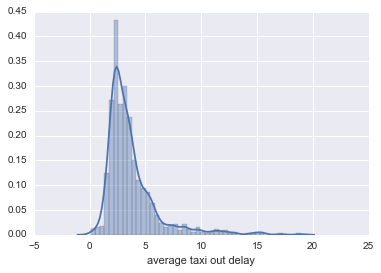

In [89]:
x = air['average taxi out delay']
sns.distplot(x)

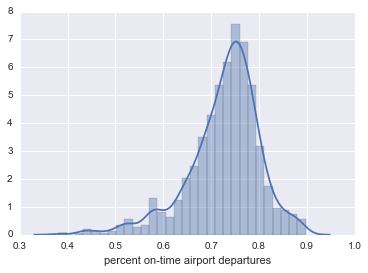

In [88]:
x = air['percent on-time airport departures']
sns.distplot(x)

In [30]:
air.describe()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,...,average taxi in delay,average block delay,average gate arrival delay,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,Latitude,Longitude
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,...,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2009.016270,113471.568210,113003.959950,0.779123,0.726958,0.766864,12.890250,13.872879,3.683292,15.703504,...,1.414155,3.290826,13.428811,1299.314143,1341.068836,174.250313,170.256571,1714.484355,36.448807,-94.899998
std,3.150126,98059.144667,97705.308115,0.052279,0.076027,0.050502,3.036474,3.806217,2.337325,4.364217,...,0.854702,0.989275,3.251647,1840.877193,1980.459892,172.638408,229.162686,1005.059201,6.686781,20.644996
min,2004.000000,731.000000,717.000000,0.529900,0.380800,0.513600,5.350000,7.240000,0.100000,6.290000,...,0.020000,1.330000,6.330000,0.000000,0.000000,0.000000,0.000000,246.000000,18.439295,-157.922429
25%,2006.000000,42064.000000,42006.500000,0.753100,0.691800,0.742150,10.830000,11.475000,2.300000,12.890000,...,0.845000,2.615000,11.270000,349.000000,314.500000,62.000000,41.000000,770.000000,32.896828,-111.977773
50%,2009.000000,79489.000000,79750.000000,0.784100,0.740200,0.770500,12.540000,12.940000,3.050000,15.130000,...,1.140000,3.130000,12.970000,670.000000,653.000000,111.000000,84.000000,1531.000000,37.618972,-87.897068
75%,2012.000000,166469.500000,165560.500000,0.810700,0.773700,0.797600,14.620000,15.745000,4.220000,17.555000,...,1.775000,3.815000,14.935000,1483.500000,1542.000000,237.000000,190.000000,2502.000000,40.795250,-80.152741
max,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,25.840000,35.760000,18.940000,40.510000,...,6.180000,7.520000,27.780000,16618.000000,17571.000000,1064.000000,1948.000000,3575.000000,61.174083,-66.002004


In [90]:
air.dtypes

airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
Key                                   float64
AP_NAME                                object
ALIAS                             

In [92]:
air2 = air.drop(['airport', 'AP_NAME', 'ALIAS', 'Facility Type', 'FAA REGION', 'COUNTY', 'CITY', 'STATE', 'AP Type', 'Boundary Data Available'], axis=1)

In [93]:
air2

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,...,average taxi in delay,average block delay,average gate arrival delay,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,Latitude,Longitude
0,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,...,0.83,2.55,10.87,242.0,235.0,71.0,46.0,2348.0,35.040194,-106.609194
1,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,...,0.89,2.34,10.24,221.0,190.0,61.0,33.0,2348.0,35.040194,-106.609194
2,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,...,0.84,2.66,11.82,392.0,329.0,71.0,124.0,2348.0,35.040194,-106.609194
3,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,...,1.29,3.06,12.71,366.0,304.0,107.0,45.0,2348.0,35.040194,-106.609194
4,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,...,1.03,2.79,11.48,333.0,300.0,79.0,42.0,2348.0,35.040194,-106.609194
5,2009,42550,42704,0.8341,0.8147,0.8224,9.24,9.88,1.89,10.45,...,0.92,1.98,9.27,192.0,162.0,74.0,26.0,2348.0,35.040194,-106.609194
6,2010,42302,42169,0.8144,0.7907,0.8047,10.25,9.95,2.05,11.58,...,0.95,1.90,10.23,222.0,177.0,71.0,50.0,2348.0,35.040194,-106.609194
7,2011,42283,42297,0.8072,0.7758,0.8022,10.81,10.50,2.51,12.57,...,0.84,1.87,10.63,345.0,294.0,77.0,61.0,2348.0,35.040194,-106.609194
8,2012,39105,39107,0.8219,0.7940,0.8177,10.55,10.27,2.32,12.11,...,0.98,1.80,9.73,237.0,181.0,65.0,60.0,2348.0,35.040194,-106.609194
9,2013,35277,34989,0.7710,0.7402,0.7554,12.56,10.77,2.64,14.28,...,0.92,2.35,12.76,232.0,212.0,62.0,46.0,2348.0,35.040194,-106.609194


In [99]:
columns = []

for i in air2:
    columns.append(i)
    
columns

['year',
 'departures for metric computation',
 'arrivals for metric computation',
 'percent on-time gate departures',
 'percent on-time airport departures',
 'percent on-time gate arrivals',
 'average_gate_departure_delay',
 'average_taxi_out_time',
 'average taxi out delay',
 'average airport departure delay',
 'average airborne delay',
 'average taxi in delay',
 'average block delay',
 'average gate arrival delay',
 'Departure Cancellations',
 'Arrival Cancellations',
 'Departure Diversions',
 'Arrival Diversions',
 'Key',
 'Latitude',
 'Longitude']

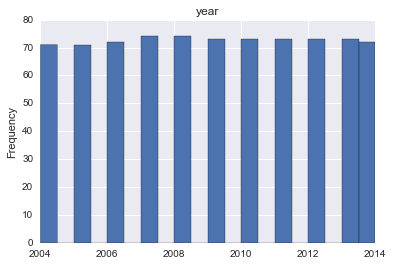

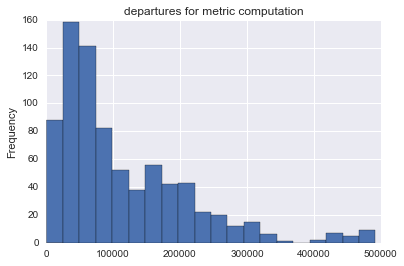

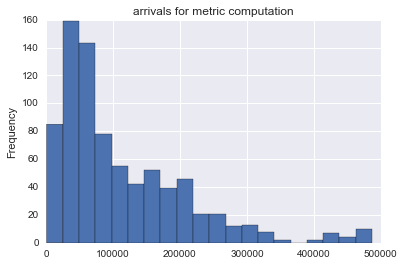

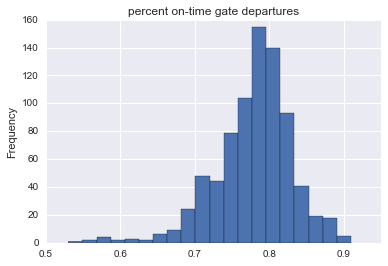

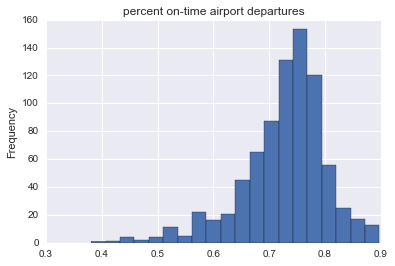

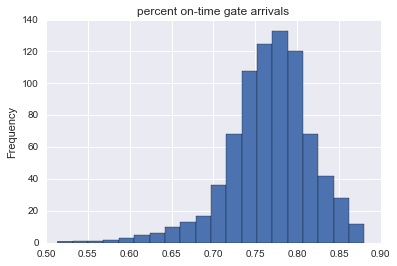

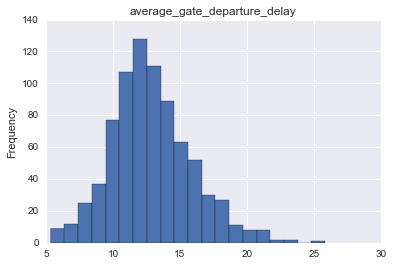

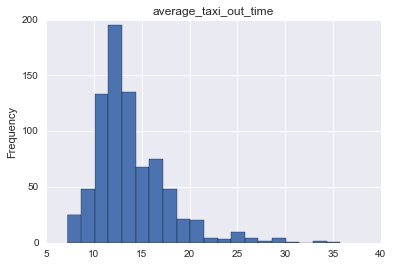

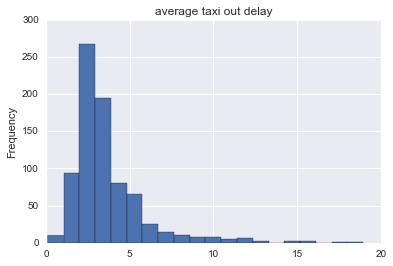

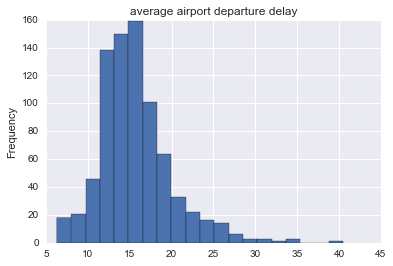

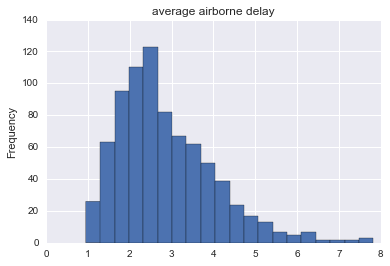

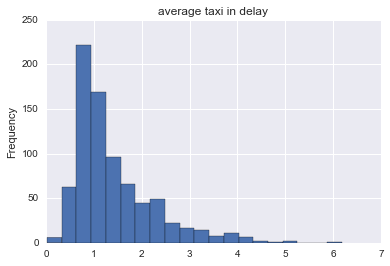

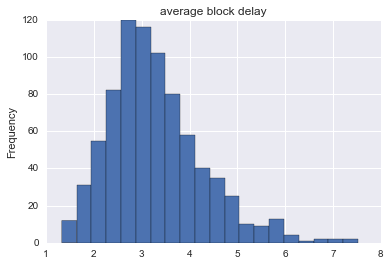

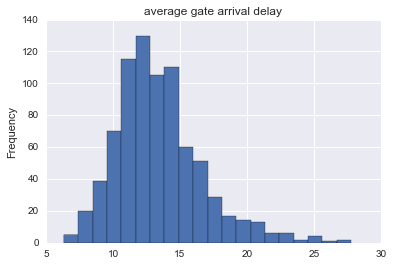

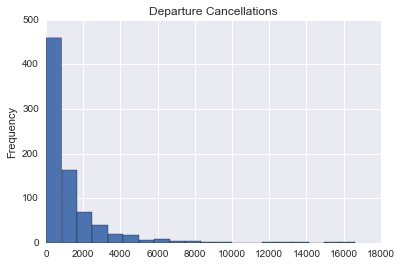

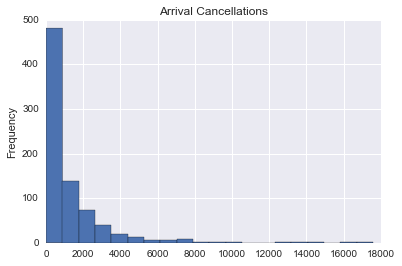

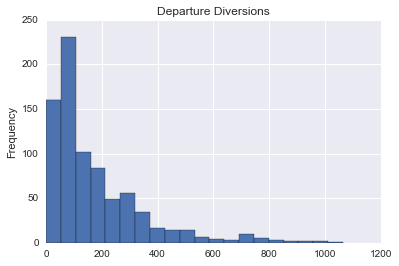

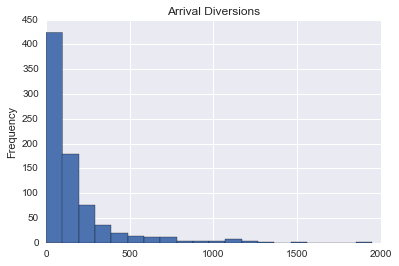

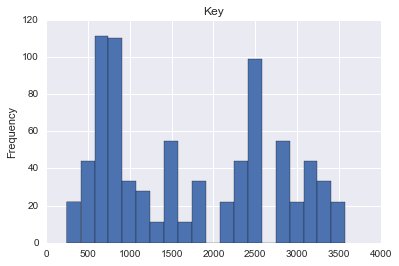

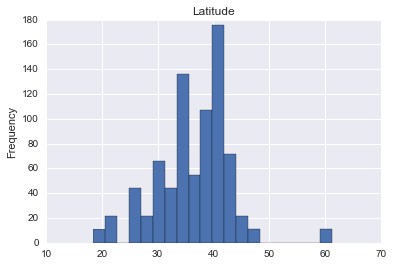

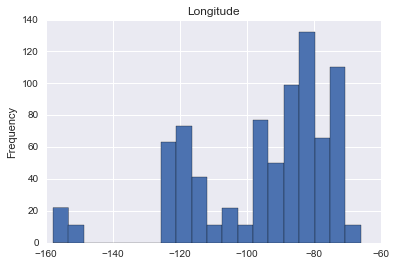

In [101]:
plt.figure()
for i in columns:
    air2[i].plot(kind='hist', bins=20, title=i)
    plt.show()

## Part 3: Data Mining

#### Are there any unique values?

Yes.

#### 3.1 Create Dummy Variables

In [106]:
air.dtypes

airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
Key                                   float64
AP_NAME                                object
ALIAS                             

In [110]:
le = preprocessing.LabelEncoder()

air.airport = le.fit_transform(air.airport)
air.CITY = le.fit_transform(air.CITY)

In [112]:
air3 = air.drop(['AP_NAME', 'ALIAS', 'Facility Type', 'FAA REGION', 'COUNTY', 'STATE', 'AP Type', 'Boundary Data Available'], axis=1)

In [114]:
air3.shape

(799, 23)

#### 3.2 Format the data

In [115]:
air3.dtypes

airport                                 int64
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
Key                                   float64
CITY                                    int64
Latitude                          

## Part 4: Refine the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell?

In [ ]:
# x_axis = []

# for i in air3:
#     x_axis.append(i)

    
# plt.plot(x_axis, norm.pdf(x_axis,0,2))

# Lets try to find a more efficient method here:



airport :
NormaltestResult(statistic=19.028055025172939, pvalue=7.3809174926600695e-05)


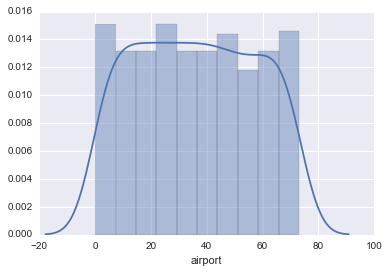


year :
NormaltestResult(statistic=3.8395204688264708, pvalue=0.14664211764902249)


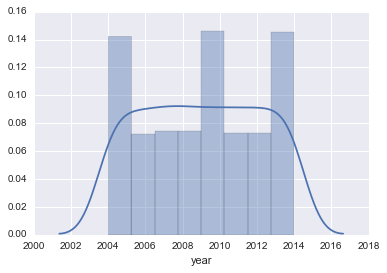


departures for metric computation :
NormaltestResult(statistic=21.962676845577825, pvalue=1.7016307265406845e-05)


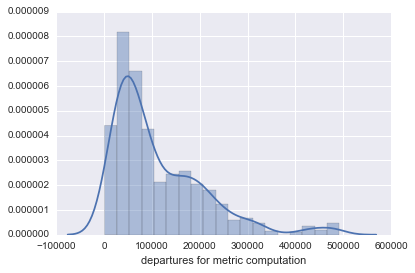


arrivals for metric computation :
NormaltestResult(statistic=21.40831238160094, pvalue=2.2451431299925196e-05)


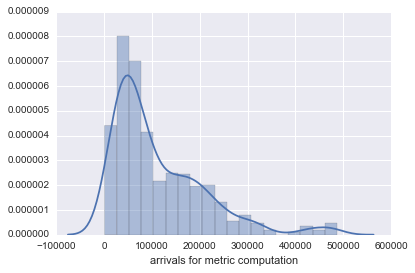


percent on-time gate departures :
NormaltestResult(statistic=14.094801791851591, pvalue=0.00086966637582396999)


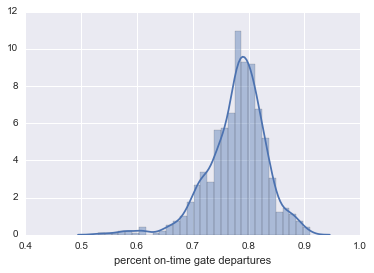


percent on-time airport departures :
NormaltestResult(statistic=3.6595854311503282, pvalue=0.16044682245577452)


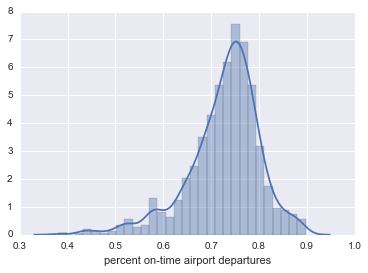


percent on-time gate arrivals :
NormaltestResult(statistic=5.7741722242326476, pvalue=0.055738391635026439)


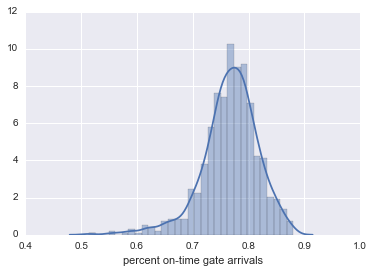


average_gate_departure_delay :
NormaltestResult(statistic=8.1282792531028658, pvalue=0.017177762208080705)


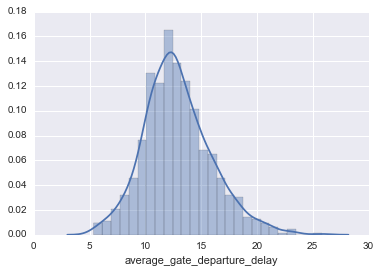


average_taxi_out_time :
NormaltestResult(statistic=2.5480066898012366, pvalue=0.27970960334930639)


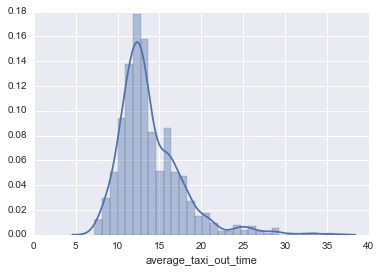


average taxi out delay :
NormaltestResult(statistic=21.254413390493937, pvalue=2.4247265853491751e-05)


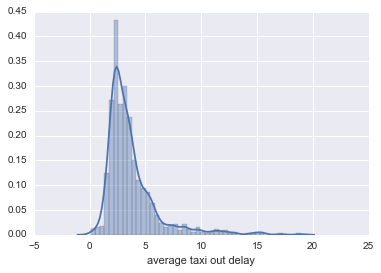


average airport departure delay :
NormaltestResult(statistic=0.80926474875369192, pvalue=0.66722205370020982)


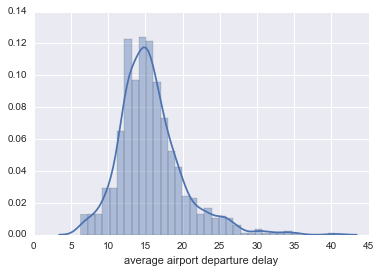


average airborne delay :
NormaltestResult(statistic=8.3479360615033613, pvalue=0.015391066569799515)


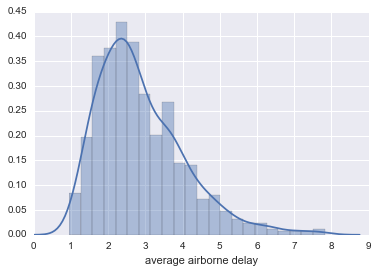


average taxi in delay :
NormaltestResult(statistic=26.972249581161517, pvalue=1.3901140128104863e-06)


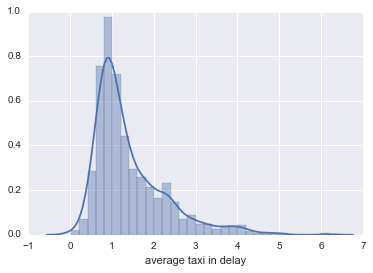


average block delay :
NormaltestResult(statistic=2.1005585368336921, pvalue=0.34984003619466719)


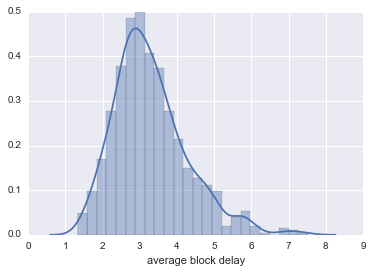


average gate arrival delay :
NormaltestResult(statistic=5.4297896641160497, pvalue=0.066211916011865574)


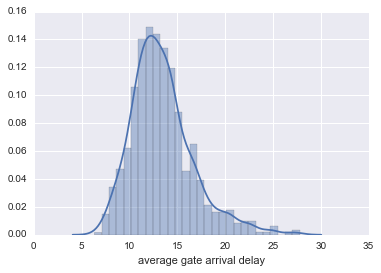


Departure Cancellations :
NormaltestResult(statistic=48.505103334540678, pvalue=2.9325852024407328e-11)


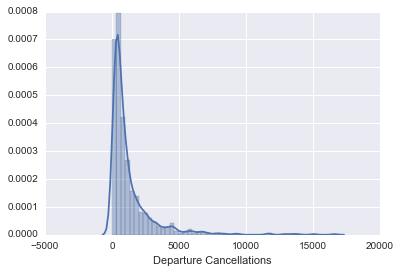


Arrival Cancellations :
NormaltestResult(statistic=47.824698818816998, pvalue=4.1209619269546592e-11)


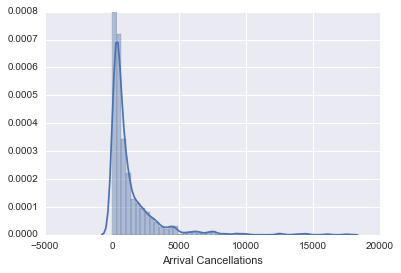


Departure Diversions :
NormaltestResult(statistic=28.839226455150424, pvalue=5.4656465573325958e-07)


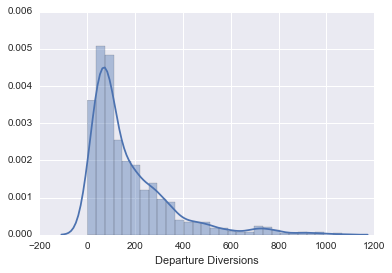


Arrival Diversions :
NormaltestResult(statistic=67.041793724004791, pvalue=2.7673205259936256e-15)


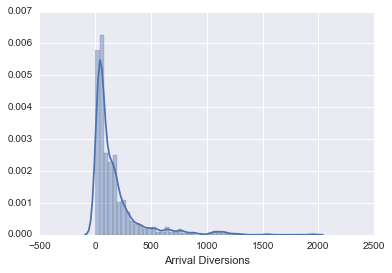


Key :
NormaltestResult(statistic=16.241981831432007, pvalue=0.000297233980641523)


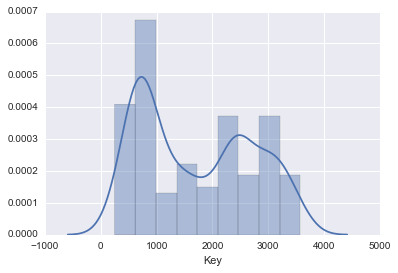


CITY :
NormaltestResult(statistic=14.506306448269177, pvalue=0.00070793857668084205)


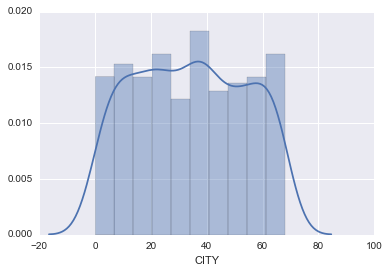


Latitude :
NormaltestResult(statistic=8.605962435272005, pvalue=0.013528168421264444)


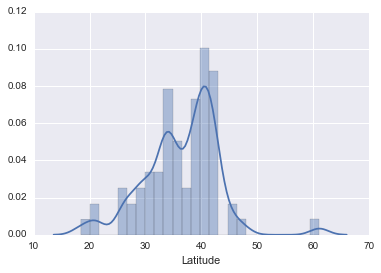


Longitude :
NormaltestResult(statistic=9.1209596978376162, pvalue=0.010457039940032272)


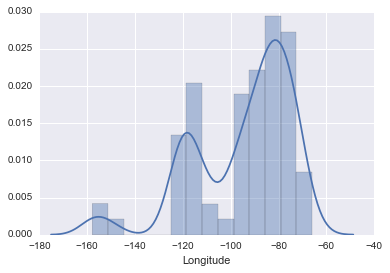

In [125]:
for i in air3:
    rand_sample = air3[i].sample(50, random_state=6)
    print i,':\n', scipy.stats.mstats.normaltest(rand_sample)
    sns.distplot(air3[i])
    plt.xlabel(i)
    plt.show()
    print

#### 4.2 Find correlations in the data

In [116]:
air3.corr()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,average block delay,average gate arrival delay,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,CITY,Latitude,Longitude
airport,1.000000,0.009206,-0.182136,-0.180795,0.068105,0.134896,0.002305,-0.134387,-0.146846,-0.141269,...,-0.047013,-0.099581,-0.167118,-0.165269,-0.165109,-0.181102,-0.034238,0.673084,-0.145421,-0.152194
year,0.009206,1.000000,-0.068488,-0.067507,0.002818,0.056174,0.135191,0.061650,-0.052435,-0.160599,...,-0.321256,-0.064928,-0.074954,-0.071526,-0.021804,-0.035331,-0.004863,0.002978,0.002632,-0.004275
departures for metric computation,-0.182136,-0.068488,1.000000,0.999807,-0.063251,-0.399942,0.103680,0.131396,0.638656,0.604125,...,0.358669,0.102899,0.808959,0.823676,0.934147,0.798750,0.015834,-0.211992,0.091516,0.070800
arrivals for metric computation,-0.180795,-0.067507,0.999807,1.000000,-0.062713,-0.399040,0.104228,0.129871,0.636674,0.603439,...,0.355442,0.101622,0.809994,0.824622,0.934035,0.799456,0.016118,-0.210358,0.091050,0.069939
percent on-time gate departures,0.068105,0.002818,-0.063251,-0.062713,1.000000,0.818598,0.782703,-0.913107,-0.169598,-0.212539,...,-0.342640,-0.712282,-0.183962,-0.172420,-0.051995,-0.142091,-0.166689,-0.004857,-0.149575,-0.428669
percent on-time airport departures,0.134896,0.056174,-0.399942,-0.399040,0.818598,1.000000,0.695697,-0.826633,-0.653223,-0.725766,...,-0.561451,-0.753545,-0.466213,-0.453081,-0.357375,-0.431068,-0.199730,0.023301,-0.217569,-0.475388
percent on-time gate arrivals,0.002305,0.135191,0.103680,0.104228,0.782703,0.695697,1.000000,-0.800603,-0.230311,-0.287357,...,-0.550010,-0.922723,-0.113363,-0.094130,0.067575,-0.028064,-0.127802,-0.118929,-0.139634,-0.446996
average_gate_departure_delay,-0.134387,0.061650,0.131396,0.129871,-0.913107,-0.826633,-0.800603,1.000000,0.331777,0.339046,...,0.435036,0.850259,0.291753,0.275300,0.124451,0.218199,0.151160,-0.025045,0.210009,0.491185
average_taxi_out_time,-0.146846,-0.052435,0.638656,0.636674,-0.169598,-0.653223,-0.230311,0.331777,1.000000,0.923359,...,0.600592,0.442335,0.566103,0.559625,0.571622,0.558053,0.135167,-0.018967,0.180229,0.333212
average taxi out delay,-0.141269,-0.160599,0.604125,0.603439,-0.212539,-0.725766,-0.287357,0.339046,0.923359,1.000000,...,0.579919,0.469840,0.599671,0.588159,0.554316,0.581730,0.130141,-0.024174,0.177375,0.306213


#### 4.3 What is the p-value? What does this mean?

The p-value of a given feature quantifies the degree of significance of that given variable relative to the target feature.
For example, above we can see that 'City' relative to 'Airport'....City has a p-value of .67- .67 is the largest p-value
in this situation (meaning 'city' coorelation to 'airport' is quite significant)

#### 4.4 What is the value of understanding correlations before PCA?¶

Understanding coorelations before a PCA is a quick way to determine WHICH feature to select for the PCA itself

## Part 5: Perform a PCA and Present Findings

In [142]:
air3.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions', u'Key', u'CITY',
       u'Latitude', u'Longitude'],
      dtype='object')

In [145]:
air4 = air3.drop(['airport', 'departures for metric computation', 'arrivals for metric computation', 'average taxi out delay', 'average taxi in delay', 'Departure Cancellations', 'Arrival Diversions', 'Key'], axis=1)
air4

,year,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average airport departure delay,average airborne delay,average block delay,average gate arrival delay,Arrival Cancellations,Departure Diversions,CITY,Latitude,Longitude
0,2004,0.8030,0.7809,0.7921,10.38,9.89,12.10,2.46,2.55,10.87,235.0,71.0,0,35.040194,-106.609194
1,2005,0.8140,0.7922,0.8001,9.60,9.79,11.20,2.26,2.34,10.24,190.0,61.0,0,35.040194,-106.609194
2,2006,0.7983,0.7756,0.7746,10.84,9.89,12.33,2.12,2.66,11.82,329.0,71.0,0,35.040194,-106.609194
3,2007,0.8005,0.7704,0.7647,11.29,10.34,12.95,2.19,3.06,12.71,304.0,107.0,0,35.040194,-106.609194
4,2008,0.8103,0.7844,0.7875,10.79,10.41,12.32,1.82,2.79,11.48,300.0,79.0,0,35.040194,-106.609194
5,2009,0.8341,0.8147,0.8224,9.24,9.88,10.45,1.74,1.98,9.27,162.0,74.0,0,35.040194,-106.609194
6,2010,0.8144,0.7907,0.8047,10.25,9.95,11.58,1.66,1.90,10.23,177.0,71.0,0,35.040194,-106.609194
7,2011,0.8072,0.7758,0.8022,10.81,10.50,12.57,1.58,1.87,10.63,294.0,77.0,0,35.040194,-106.609194
8,2012,0.8219,0.7940,0.8177,10.55,10.27,12.11,1.41,1.80,9.73,181.0,65.0,0,35.040194,-106.609194
9,2013,0.7710,0.7402,0.7554,12.56,10.77,14.28,1.60,2.35,12.76,212.0,62.0,0,35.040194,-106.609194


In [ ]:
# When performing a PCA you want columns that are closer to 0 and not toward 1.0 or -1.0.  Remember the assumption of
# independence between variables/features

#### 5.1 Define your "X" and "Y" variables

In [132]:
air3.head(1)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,average block delay,average gate arrival delay,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,CITY,Latitude,Longitude
0,0,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,...,2.55,10.87,242.0,235.0,71.0,46.0,2348.0,0,35.040194,-106.609194


In [133]:
# x = air3.ix[:,2:24].values
# y = air3.ix[:,0].values

In [153]:
air4.corr()

,year,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average airport departure delay,average airborne delay,average block delay,average gate arrival delay,Arrival Cancellations,Departure Diversions,CITY,Latitude,Longitude
year,1.000000,0.002818,0.056174,0.135191,0.061650,-0.052435,-0.023332,-0.334442,-0.321256,-0.064928,-0.071526,-0.021804,0.002978,0.002632,-0.004275
percent on-time gate departures,0.002818,1.000000,0.818598,0.782703,-0.913107,-0.169598,-0.764464,-0.265446,-0.342640,-0.712282,-0.172420,-0.051995,-0.004857,-0.149575,-0.428669
percent on-time airport departures,0.056174,0.818598,1.000000,0.695697,-0.826633,-0.653223,-0.954832,-0.558150,-0.561451,-0.753545,-0.453081,-0.357375,0.023301,-0.217569,-0.475388
percent on-time gate arrivals,0.135191,0.782703,0.695697,1.000000,-0.800603,-0.230311,-0.712975,-0.271240,-0.550010,-0.922723,-0.094130,0.067575,-0.118929,-0.139634,-0.446996
average_gate_departure_delay,0.061650,-0.913107,-0.826633,-0.800603,1.000000,0.331777,0.886479,0.328084,0.435036,0.850259,0.275300,0.124451,-0.025045,0.210009,0.491185
average_taxi_out_time,-0.052435,-0.169598,-0.653223,-0.230311,0.331777,1.000000,0.688469,0.611870,0.600592,0.442335,0.559625,0.571622,-0.018967,0.180229,0.333212
average airport departure delay,-0.023332,-0.764464,-0.954832,-0.712975,0.886479,0.688469,1.000000,0.554790,0.589096,0.838877,0.487547,0.360954,-0.036932,0.240283,0.506213
average airborne delay,-0.334442,-0.265446,-0.558150,-0.271240,0.328084,0.611870,0.554790,1.000000,0.514464,0.392012,0.367273,0.280685,-0.036602,0.381046,0.237785
average block delay,-0.321256,-0.342640,-0.561451,-0.550010,0.435036,0.600592,0.589096,0.514464,1.000000,0.643705,0.388365,0.330366,-0.048894,0.090470,0.164601
average gate arrival delay,-0.064928,-0.712282,-0.753545,-0.922723,0.850259,0.442335,0.838877,0.392012,0.643705,1.000000,0.305527,0.127359,0.040754,0.202383,0.466460


In [147]:
x = air4.ix[:,2:16].values
y = air4.ix[:,0].values

#### 5.2 Standardize the x values

In [148]:
xStand = StandardScaler().fit_transform(x)

#### 5.3 Create the covariance matrix

In [149]:
covMat = np.cov(xStand.T)

#### Check the Eigenvalues and Eigenvectors

In [150]:
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [151]:
print(eigenValues)

[ 6.118923    2.10988447  1.09929892  0.9984702   0.82814611  0.666936
  0.42789932  0.31983522  0.00847717  0.02296165  0.10663586  0.16714496
  0.14167784]


In [152]:
print(eigenVectors)

[[-0.37519828  0.0377748  -0.03070625  0.01478271  0.07123942  0.04124003
  -0.4025413   0.14056364  0.39870495  0.22454872 -0.63146456  0.20727509
  -0.13025458]
 [-0.3034941   0.38583415 -0.09514949  0.03429643 -0.20590784  0.09565512
   0.19272642 -0.1430755  -0.26162705 -0.479358   -0.39504679 -0.02401142
   0.42983757]
 [ 0.33674257 -0.2529262   0.09673441 -0.21171098 -0.02288125 -0.22786534
   0.26780862  0.02458994 -0.23322756  0.44945038 -0.51369748 -0.16753389
   0.30875227]
 [ 0.29353361  0.29872103 -0.06185723  0.27860557 -0.11903971  0.26842993
   0.04804482 -0.5907312  -0.11462365  0.32993856 -0.09859875  0.36384668
  -0.20385165]
 [ 0.39019094 -0.04462912  0.03757698 -0.03942739 -0.06611128 -0.06182427
   0.29201056 -0.16162782  0.76282281 -0.33424497 -0.11254078  0.05924026
   0.11581406]
 [ 0.25683452  0.17127735 -0.46264362  0.18312598  0.03032474  0.39602803
   0.291288    0.61389117 -0.00719235  0.04259655 -0.10861014 -0.04421724
  -0.14845699]
 [ 0.28977986  0.07596

#### 5.4 Print the Eigenpairs

#### 5.5 Calculate the explained variance

#### 5.6 Conduct the PCA

#### 5.7 Create a dataframe from the PCA results

Now, create a new dataframe that uses the airport and year from the original set and join the PCA results with it to form a new set

#### 5.8 Graph the results to a new feature space

#### 5.9 Write an analysis plan of your findings

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps

## Bonus:

#### 1. Conduct the analysis again using different variables from the airport_operations.csv dataset

#### 2. Create visualization of your data using the ggplot features of matplotlib